# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import seaborn as sns 
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code == 200):
            # Extract data
            city_weather = response.json()

            
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_name = city_weather.get("name")
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng = city_weather.get("coord", {}).get("lon")
            city_max_temp = city_weather.get("main", {}).get("temp_max")
            city_humidity = city_weather.get("main", {}).get("humidity")
            city_clouds = city_weather.get("clouds", {}).get("all")
            city_wind = city_weather.get("wind", {}).get("speed")
            city_country = city_weather.get("sys", {}).get("country")
            city_date = city_weather.get("dt")
    
            # Append the City information into city_data list
            city_data.append({"City": city_name,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"The API threw a non-200 status code: {response['status_code']} for city {city}") # error log
            print()

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | howard springs
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | yuxia
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | langepas
Processing Record 7 of Set 1 | puerto la cruz
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | arar
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | mahina
Processing Record 12 of Set 1 | vilhena
Processing Record 13 of Set 1 | arys
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | susuman
Processing Record 18 of Set 1 | cabedelo
Processing Record 19 of Set 1 | atafu village
Processing Record 20 of Set 1 | dzhangala
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | wotho
Processing Record 2

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Howard Springs,-12.4970,131.0470,82.81,87,100,2.10,AU,1733255718
1,West Island,-12.1568,96.8225,82.38,89,100,5.75,CC,1733255719
2,Albany,42.6001,-73.9662,31.59,71,99,3.24,US,1733255692
3,Yuxia,34.0615,108.6291,45.70,48,100,3.91,CN,1733255721
4,Puerto Ayora,-0.7393,-90.3518,73.54,91,100,5.99,EC,1733255722


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Howard Springs,-12.4970,131.0470,82.81,87,100,2.10,AU,1733255718
1,West Island,-12.1568,96.8225,82.38,89,100,5.75,CC,1733255719
2,Albany,42.6001,-73.9662,31.59,71,99,3.24,US,1733255692
3,Yuxia,34.0615,108.6291,45.70,48,100,3.91,CN,1733255721
4,Puerto Ayora,-0.7393,-90.3518,73.54,91,100,5.99,EC,1733255722


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

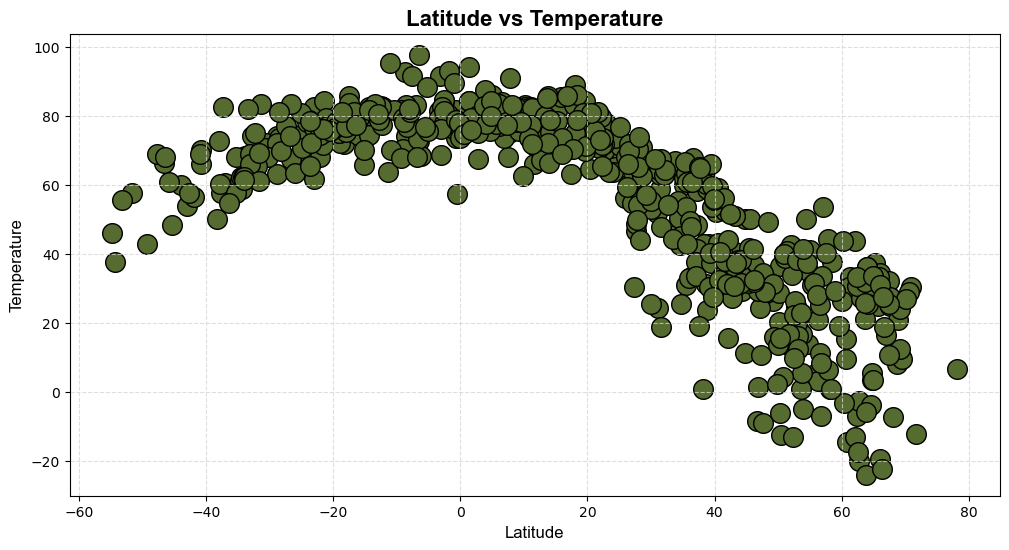

In [8]:
# Build scatter plot for latitude vs. temperature
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="darkolivegreen", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

# Show plot
plt.show()

#### Latitude Vs. Humidity

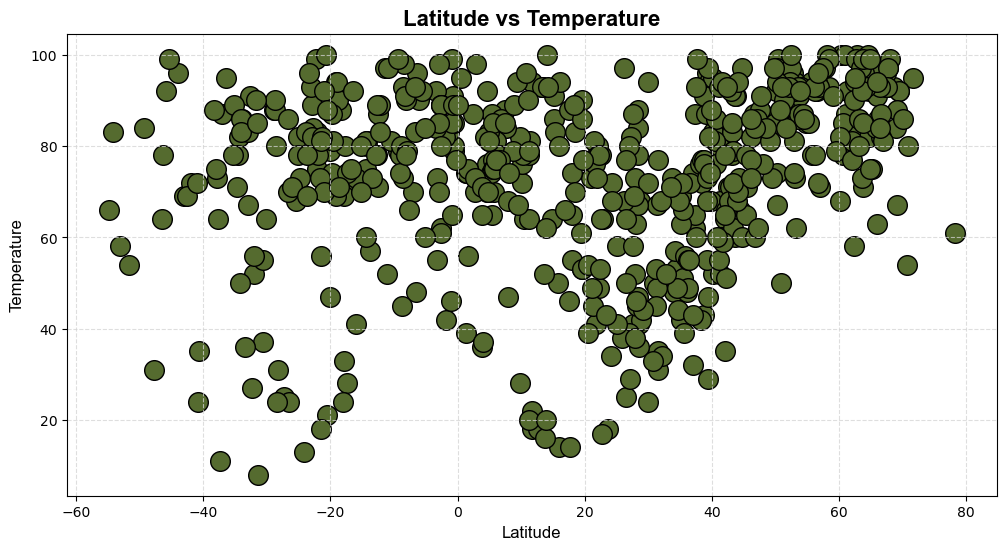

<Figure size 640x480 with 0 Axes>

In [9]:
# Build scatter plot for latitude vs. Humidity
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df.Humidity, color="darkolivegreen", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

# Show plot
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

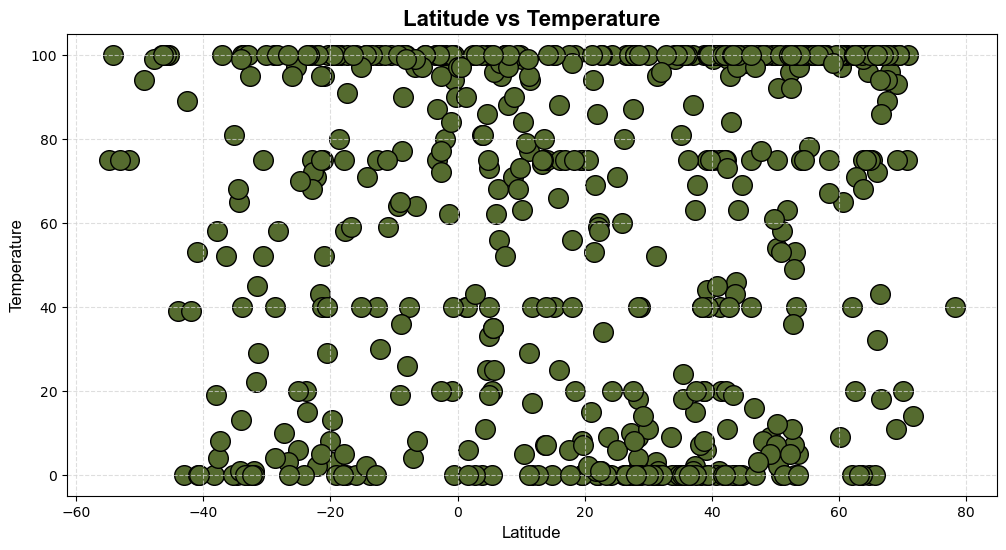

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df.Cloudiness, color="darkolivegreen", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

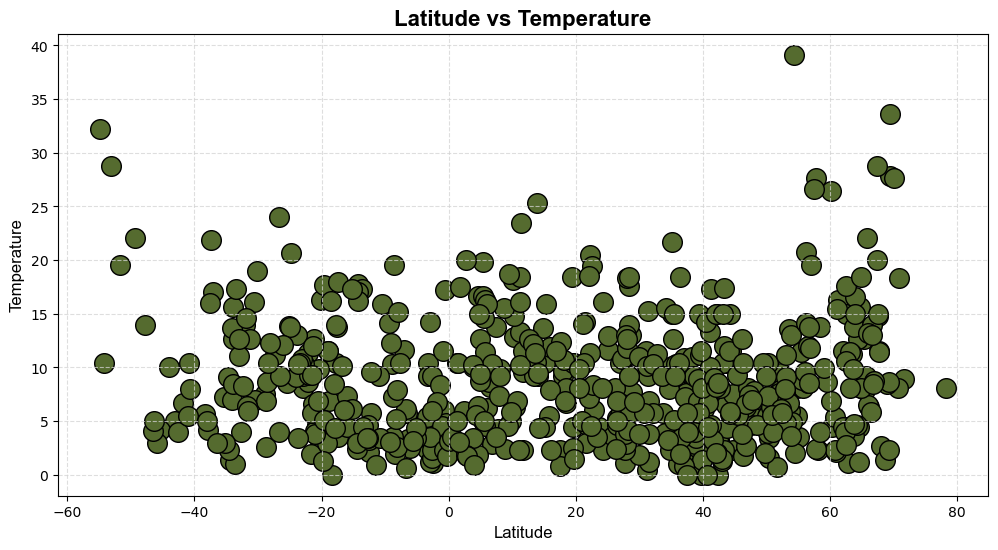

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="darkolivegreen", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def do_regression_plot(x_values, y_values, x_label, y_label, annotation):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_eq)

    # Change Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x_values, y_values, color="darkolivegreen", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6)
    
    # Customizations
    
    # Change colors
    # Add in reference lines
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")
    
    # # Set X/Y Limits
    # plt.ylim(0, 90)
    # plt.xlim(-2, 75)
    
    # Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    
    
    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")
    
    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[city_data_df.Lat >=0].reset_index(drop=True)

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,31.59,71,99,3.24,US,1733255692
1,Yuxia,34.0615,108.6291,45.70,48,100,3.91,CN,1733255721
2,Langepas,61.2544,75.2124,33.21,92,100,16.28,RU,1733255723
3,Puerto La Cruz,10.2167,-64.6167,82.98,72,99,12.86,VE,1733255725
4,Arar,30.9753,41.0381,51.82,50,0,11.50,SA,1733255727


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[city_data_df.Lat <=0].reset_index(drop=True)

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Howard Springs,-12.4970,131.0470,82.81,87,100,2.10,AU,1733255718
1,West Island,-12.1568,96.8225,82.38,89,100,5.75,CC,1733255719
2,Puerto Ayora,-0.7393,-90.3518,73.54,91,100,5.99,EC,1733255722
3,Margaret River,-33.9500,115.0667,62.19,83,100,15.66,AU,1733255535
4,Port-aux-Français,-49.3500,70.2167,42.75,84,94,22.03,TF,1733255728


###  Temperature vs. Latitude Linear Regression Plot

-0.8590461129774957
y = -0.62x + 65.9


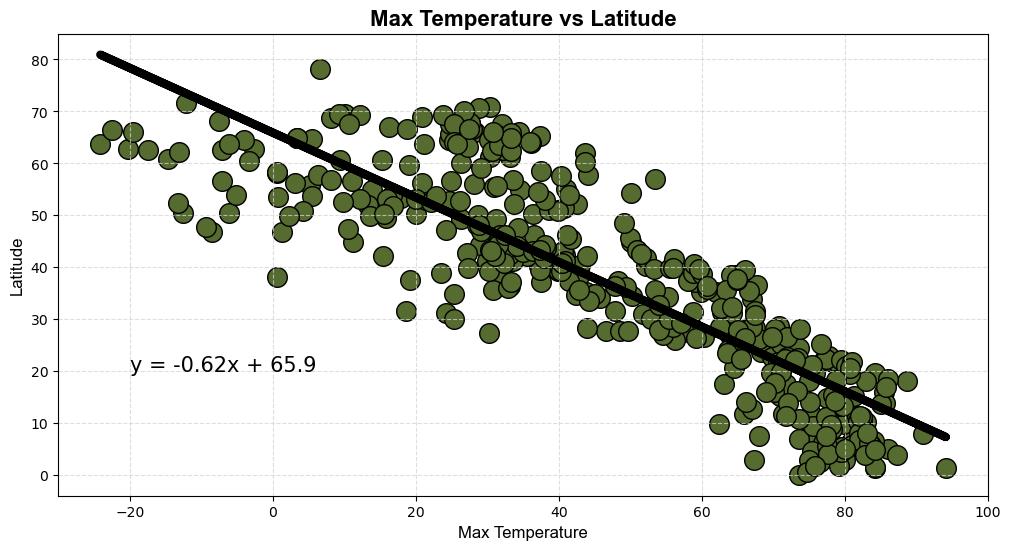

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_df["Max Temp"]
y_values = northern_df.Lat
x_label = "Max Temperature"
y_label = "Latitude"
annotation = (-20, 20)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.6873257327298853
y = 0.96x + -91.22


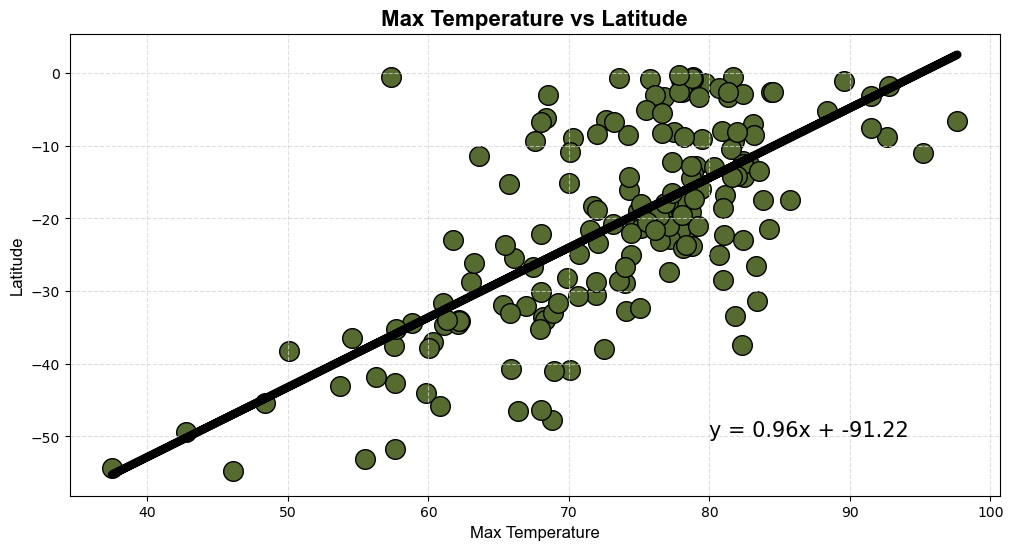

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_df["Max Temp"]
y_values = southern_df.Lat
x_label = "Max Temperature"
y_label = "Latitude"
annotation = (80, -50)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** In conclusion, the linear relationships between max temperature and latitude reveal notable differences between the Northern and Southern Hemispheres:

- In the Northern Hemisphere, there is a negative relationship between max temperature and latitude. 
- In the Southern Hemisphere, there is a positive relationship between max temperature and latitude. 

### Humidity vs. Latitude Linear Regression Plot

0.37164169199180025
y = 0.37x + 9.74


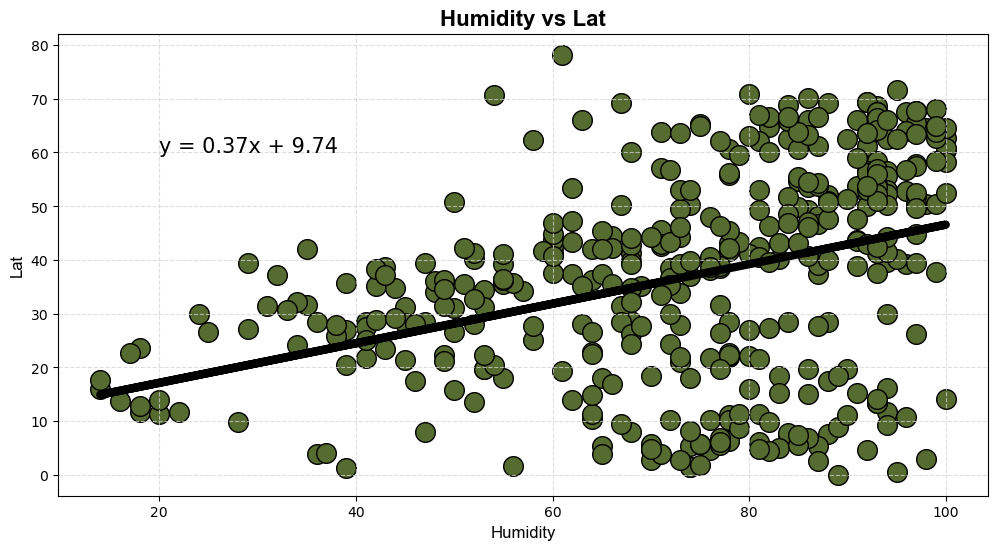

In [28]:
# Northern Hemisphere
x_values = northern_df.Humidity
y_values = northern_df.Lat
x_label = "Humidity"
y_label = "Lat"
annotation = (20, 60)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.19484879172147168
y = 0.13x + -30.0


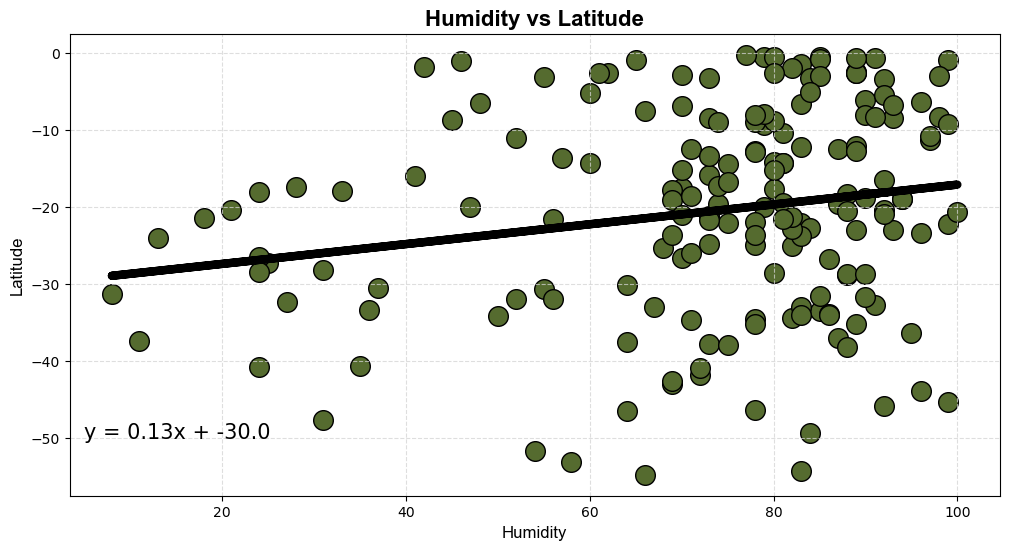

In [30]:
# Southern Hemisphere
x_values = southern_df.Humidity
y_values = southern_df.Lat
x_label = "Humidity"
y_label = "Latitude"
annotation = (5, -50)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** In conclusion, both the Northern and Southern Hemispheres show a positive linear relationship between humidity and latitude, but the strength of the relationship differs:

- In the Northern Hemisphere, the relationship is stronger, suggesting that humidity increase more notably as latitude increases.
- In the Southern Hemisphere, the relationship is weaker, indicating a more gradual increase in humidity with latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

0.17927932238840272
y = 0.09x + 31.74


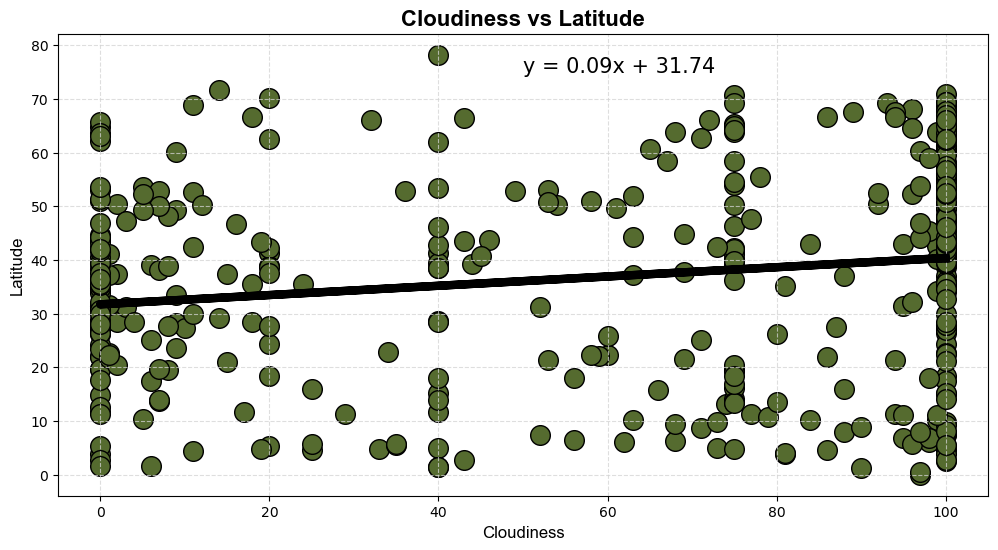

In [32]:
# Northern Hemisphere
x_values = northern_df.Cloudiness
y_values = northern_df.Lat
x_label = "Cloudiness"
y_label = "Latitude"
annotation = (50, 75)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.20199351296224335
y = 0.07x + -25.04


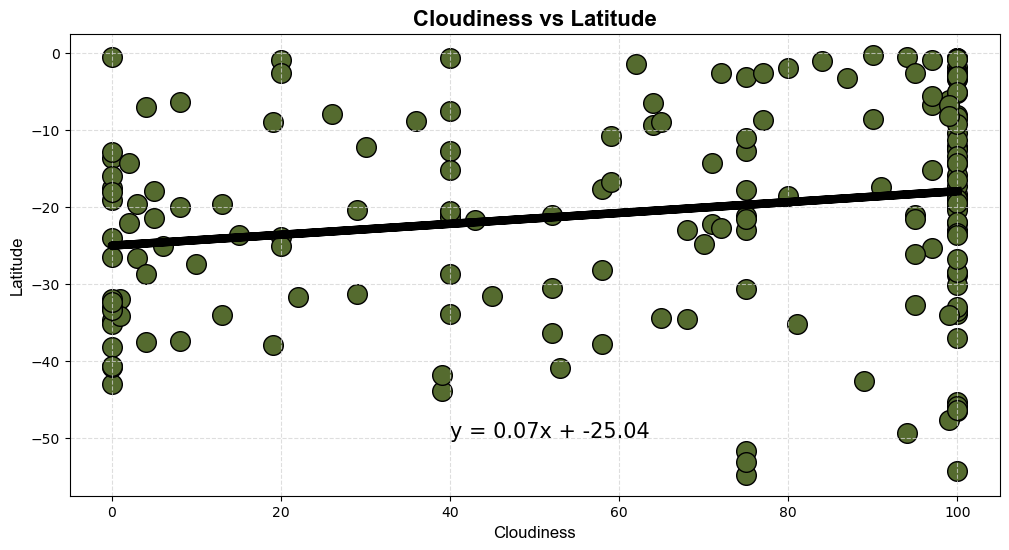

In [24]:
# Southern Hemisphere
x_values = southern_df.Cloudiness
y_values = southern_df.Lat
x_label = "Cloudiness"
y_label = "Latitude"
annotation = (40, -50)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** In conclusion, both the Northern and Southern Hemispheres show a positive linear reltionship between cloudiness and latitude, with cloudiness generally increasing as latitude increase. However, the strength of the relationship differs:

- In the Northern Hemisphere, the relationship is moderately strong, suggesting a more noticeable increase in cloudiness with hiher latitudes.
- in the Southern Hemisphere, the relationship is weaker, with cloudiness increasing more gradually with latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

0.05761734573399095
y = 0.2x + 35.07


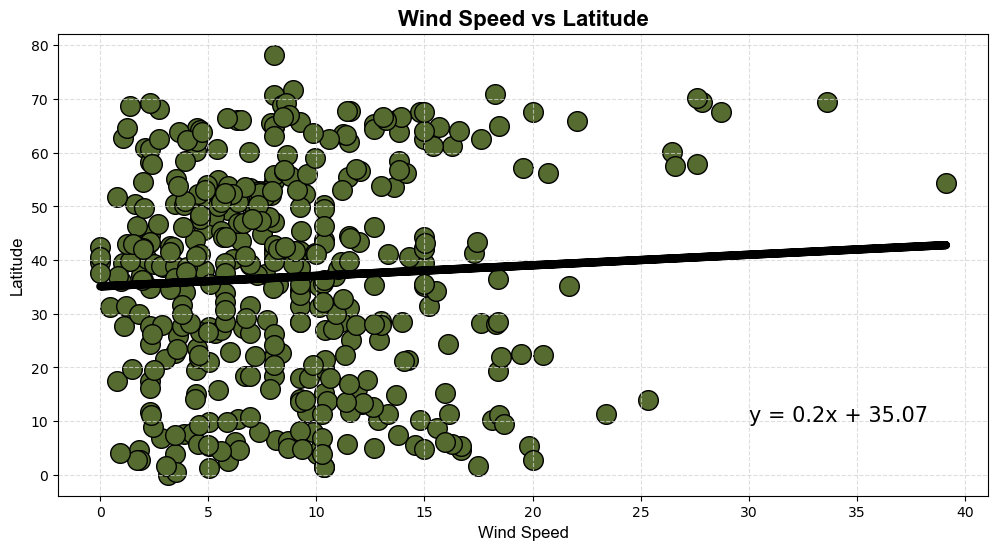

In [33]:
# Northern Hemisphere
x_values = northern_df["Wind Speed"]
y_values = northern_df.Lat
x_label = "Wind Speed"
y_label = "Latitude"
annotation = (30, 10)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

-0.32462567982889207
y = -0.76x + -14.15


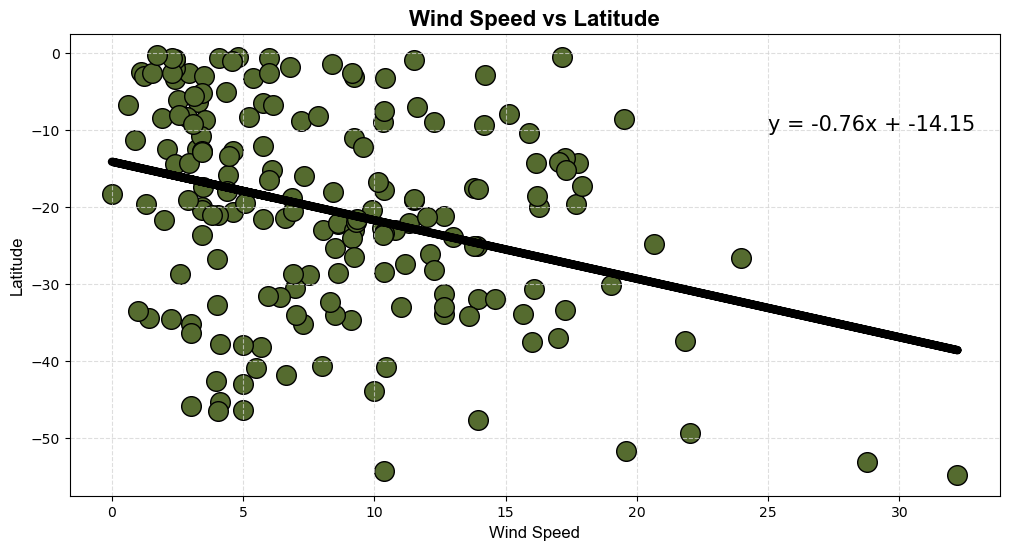

In [34]:
# Southern Hemisphere
x_values = southern_df["Wind Speed"]
y_values = southern_df.Lat
x_label = "Wind Speed"
y_label = "Latitude"
annotation = (25, -10)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** in conclusion, the linear relationships between wind speed and latitude differ notably between the Northern and Southern Hemisphere:

- in the Northern Hemisphere, there is a positive relationship between wind speed and latitude, wind speeds increasing gradually as one moves toward higher latitudes
- in the Southern Hemisphere, there is a negative relationship between wind speed and latitude, with the speeds decreasing more sharply as one moves toward higher latitudes.